Finding stars and planets similar to ours
-------------------------------------------------
What I'm attempting to find out in this notebook:

 - Stars similar to the Sun
 - Planets that could potentially have life

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [36]:
#read data 
planets = pd.read_csv('oec.csv')
planets.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [37]:
planets.columns

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'ListsPlanetIsOn'],
      dtype='object')

In [38]:
planets.shape

(3584, 25)

In [39]:
planets.corr()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
TypeFlag,1.000000,0.074365,0.161668,0.105883,0.017146,0.085962,-0.056071,0.181853,0.046260,0.046352,0.061888,1.0,-0.152539,-0.117392,0.021396,0.053233,0.035224,-0.016042,0.043358
PlanetaryMassJpt,0.074365,1.000000,0.291298,0.027007,0.023652,0.172180,0.032763,0.096830,0.371736,0.104287,0.110829,-1.0,-0.031581,-0.025741,0.128421,0.119114,-0.012679,0.016837,0.279185
RadiusJpt,0.161668,0.291298,1.000000,0.035396,0.076474,-0.082857,0.119037,0.061842,-0.322510,0.034808,0.403288,NaN,-0.141393,-0.110880,0.352054,0.344886,0.156947,0.168315,-0.157638
PeriodDays,0.105883,0.027007,0.035396,1.000000,0.973081,0.092587,-0.054098,0.249079,0.062804,0.130177,-0.009633,NaN,-0.189025,-0.050232,0.086769,0.010321,-0.058849,0.071103,-0.091984
SemiMajorAxisAU,0.017146,0.023652,0.076474,0.973081,1.000000,0.147649,-0.052247,0.268303,0.067924,0.163516,0.026295,NaN,-0.036197,-0.003384,0.032203,0.001502,-0.043767,0.004934,-0.060898
Eccentricity,0.085962,0.172180,-0.082857,0.092587,0.147649,1.000000,0.011672,0.100100,0.272536,0.084057,-0.480751,NaN,-0.045277,-0.196777,0.024114,0.070032,0.048119,-0.011402,0.006979
PeriastronDeg,-0.056071,0.032763,0.119037,-0.054098,-0.052247,0.011672,1.000000,0.064970,0.334104,-0.038127,-0.043936,NaN,0.024996,-0.036057,-0.052385,0.035702,-0.051738,0.048694,-0.148821
LongitudeDeg,0.181853,0.096830,0.061842,0.249079,0.268303,0.100100,0.064970,1.000000,0.376457,-0.102651,-0.588213,NaN,-0.304550,0.023952,0.346847,0.362376,-0.031860,0.330328,-0.403972
AscendingNodeDeg,0.046260,0.371736,-0.322510,0.062804,0.067924,0.272536,0.334104,0.376457,1.000000,0.100515,-0.051106,NaN,-0.021705,-0.286084,-0.037561,0.097037,-0.011506,0.004173,-0.052575
InclinationDeg,0.046352,0.104287,0.034808,0.130177,0.163516,0.084057,-0.038127,-0.102651,0.100515,1.000000,0.206963,NaN,0.341434,0.082121,0.011938,0.114883,-0.003796,0.022734,0.079870


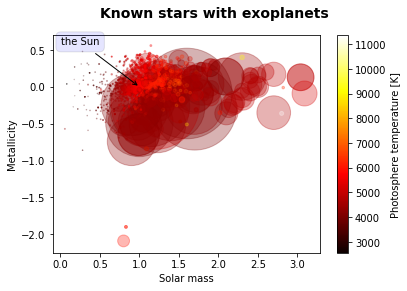

In [61]:
#display star mass, radius, metallicity and temperature as scatter plot
features = ['HostStarMassSlrMass','HostStarMetallicity','HostStarTempK', 'HostStarRadiusSlrRad']
stars_scatter = planets[features].dropna()
x = stars_scatter['HostStarMassSlrMass']
y = stars_scatter['HostStarMetallicity']
area = np.pi * stars_scatter['HostStarRadiusSlrRad']**2
colors = stars_scatter['HostStarTempK']

fig = plt.figure()
fig.suptitle('Known stars with exoplanets', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Solar mass')
ax.set_ylabel('Metallicity')

normalize = clr.Normalize(vmin=colors.min(), vmax=colors.max())
colormap = cm.hot

#add colorbar showing temperature in K
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(colors)
clb = plt.colorbar(scalarmappaple)
clb.set_label('Photosphere temperature [K]')


#mark the Sun on the plot
plt.scatter(x, y, s=area, c = colors, cmap = colormap, alpha=0.3)
plt.annotate('the Sun', xy = (1,0), 
             xytext = (-40, 40),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.1),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )
plt.show()

We can see clustering in a group of stars with similar characteristics to the Sun, but it is mostly obscured by relatively few very large stars. Let's remove them, and leave only stars within 50% deviation from a solar mass and radius of 1.

Sun-like stars
--------------

In [47]:
stars_slr = planets[(planets.HostStarMassSlrMass > 0.5)&(planets.HostStarMassSlrMass < 1.5)&(planets.HostStarRadiusSlrRad > 0.5)&(planets.HostStarRadiusSlrRad < 1.5)]
star_features = ['HostStarMassSlrMass','HostStarRadiusSlrRad','HostStarMetallicity','HostStarTempK','HostStarAgeGyr']
stars_slr[star_features].describe()

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,2578.000000,2578.000000,1867.000000,2551.000000,329.000000
mean,0.951007,0.972899,0.022056,5526.216033,4.863245
std,0.161348,0.222534,0.156887,544.364514,3.376353
min,0.514000,0.504000,-0.710000,3540.000000,0.009500
25%,0.850000,0.807250,-0.040000,5227.500000,2.100000
50%,0.960000,0.950000,0.020000,5635.000000,4.570000
75%,1.060000,1.120000,0.080000,5904.000000,6.890000
max,1.495000,1.497000,0.560000,7400.000000,13.900000


In [ ]:
print("Number of Sun-like stars: " + str(stars_slr.shape[0]))

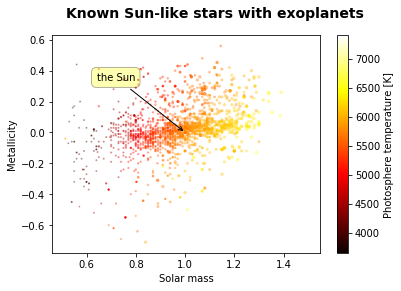

In [66]:
#let's take a look at our new selection
stars_scatter_slr = stars_slr[features].dropna()
x = stars_scatter_slr['HostStarMassSlrMass']
y = stars_scatter_slr['HostStarMetallicity']
area = np.pi * stars_scatter_slr['HostStarRadiusSlrRad']**2
colors = stars_scatter_slr['HostStarTempK']

fig = plt.figure()
fig.suptitle('Known Sun-like stars with exoplanets', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Solar mass')
ax.set_ylabel('Metallicity')

normalize = clr.Normalize(vmin=colors.min(), vmax=colors.max())
colormap = cm.hot

#add colorbar showing temperature in K
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(colors)
clb = plt.colorbar(scalarmappaple)
clb.set_label('Photosphere temperature [K]')


#mark the Sun on the plot
plt.scatter(x, y, s=area, c = (colors), cmap = colormap, alpha=0.3)
plt.annotate('the Sun', xy = (1,0), 
             xytext = (-50, 50),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.3),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )
plt.show()

Hospitable planets
------------------

Let's estabilish some very basic criteria for hospitability:

 - Minimum Jupiter mass: 0.0015 (about 1/3 of Earth's mass)
 - Maximum Jupiter mass: 0.03 (about 10 Earths, proposed upper boundary for super-Earth planets)
 - Minimum and maximum surface temperatures roughly equivalent to Earth's, with some margin (170 - 350 K)


In [67]:
planet_features = ['PlanetIdentifier','PlanetaryMassJpt','RadiusJpt','PeriodDays','SemiMajorAxisAU','SurfaceTempK','AgeGyr']
#splitting up the filtering for readability
earth_plt = planets[(planets.PlanetaryMassJpt > 0.0015)&(planets.PlanetaryMassJpt < 0.03)&(planets.SurfaceTempK > 170)&(planets.SurfaceTempK < 350)]

In [68]:
earth_plt

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
967,HD 40307 g,0,0.022334,NaN,197.800000,0.60000,0.290,NaN,NaN,NaN,...,12/11/08,05 54 04,-60 01 24,12.800,0.7700,NaN,-0.310,4977.0,NaN,Confirmed planets
1053,Gliese 163 c,0,0.021391,NaN,25.630580,0.12540,0.099,227.005878,24.522594,NaN,...,16/02/03,04 09 15.66350,-53 22 23.3050,15.000,0.4000,NaN,NaN,NaN,5.5,Confirmed planets
1971,Proxima Centauri b,2,0.004089,NaN,11.186000,0.04850,NaN,NaN,110.000000,NaN,...,16/08/22,14 39 36.204,-60 50 08.23,1.295,0.1200,0.141,NaN,3050.0,NaN,"Confirmed planets, Planets in binary systems, ..."
2567,TRAPPIST-1 c,0,0.004341,0.096234,2.421823,0.01521,NaN,NaN,NaN,NaN,...,17/02/22,23 06 30.34,-05 02 36.44,12.100,0.0802,0.117,0.040,2559.0,NaN,Confirmed planets
2569,TRAPPIST-1 e,0,0.001950,0.083658,6.099615,0.02817,NaN,NaN,NaN,NaN,...,17/02/22,23 06 30.34,-05 02 36.44,12.100,0.0802,0.117,0.040,2559.0,NaN,Confirmed planets
2570,TRAPPIST-1 f,0,0.002139,0.095231,9.206690,0.03710,NaN,NaN,NaN,NaN,...,17/02/22,23 06 30.34,-05 02 36.44,12.100,0.0802,0.117,0.040,2559.0,NaN,Confirmed planets
2571,TRAPPIST-1 g,0,0.004215,0.102704,12.352940,0.04510,NaN,NaN,NaN,NaN,...,17/02/22,23 06 30.34,-05 02 36.44,12.100,0.0802,0.117,0.040,2559.0,NaN,Confirmed planets
2755,Gliese 581 c,0,0.017301,NaN,12.914000,0.07210,NaN,NaN,NaN,NaN,...,14/07/04,15 19 26,-07 43 20,6.210,0.3100,0.300,-0.135,3498.0,NaN,Confirmed planets
2756,Gliese 581 d,0,0.019000,NaN,66.640000,0.22000,0.250,NaN,NaN,NaN,...,14/07/04,15 19 26,-07 43 20,6.210,0.3100,0.300,-0.135,3498.0,NaN,Retracted planet candidate
2759,Gliese 581 g,0,0.009752,NaN,36.500000,0.14600,0.000,NaN,NaN,NaN,...,14/07/04,15 19 26,-07 43 20,6.210,0.3100,0.300,-0.135,3498.0,NaN,Retracted planet candidate


Well, that's it. 6 planets that fulfill our very basic requirements, out of 3426. Another thing we can try is to check if a planet lies within its star's habitable zone, instead of simply filtering by surface temperature. To do this, we have to calculate the star's luminosity. 

Sources:

http://astro.unl.edu/naap/hr/hr_background2.html

http://www.planetarybiology.com/calculating_habitable_zone.html

In [69]:
planets_lum = pd.DataFrame.copy(planets)
#calculate star luminosity
planets_lum['Luminosity'] = planets_lum['HostStarRadiusSlrRad']**2  * (planets_lum['HostStarTempK']/5777)**4

#add habitable zone boundaries
planets_lum['HabZoneOut'] = np.sqrt(planets_lum['Luminosity']/0.53)
planets_lum['HabZoneIn'] = np.sqrt(planets_lum['Luminosity']/1.1)

In [70]:
planets_lum[['HostStarRadiusSlrRad','HostStarTempK','Luminosity','HabZoneOut','HabZoneIn']].head()

,HostStarRadiusSlrRad,HostStarTempK,Luminosity,HabZoneOut,HabZoneIn
0,1.362,5627.0,1.669754,1.774959,1.232054
1,1.362,5627.0,1.669754,1.774959,1.232054
2,0.450,3584.0,0.029998,0.237906,0.165138
3,0.450,3584.0,0.029998,0.237906,0.165138
4,0.450,3584.0,0.029998,0.237906,0.165138


In [72]:
earth_plt2 = planets_lum[(planets_lum.PlanetaryMassJpt > 0.0015)&(planets_lum.PlanetaryMassJpt < 0.03)&(planets_lum.SemiMajorAxisAU > planets_lum.HabZoneIn)&(planets_lum.SemiMajorAxisAU < planets_lum.HabZoneOut)]
earth_plt2[planet_features]

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,SurfaceTempK,AgeGyr
232,Gliese 3293 c,0.027000,NaN,48.140000,0.19390,NaN,NaN
410,Earth,0.003146,0.091130,365.242200,1.00000,NaN,NaN
1123,Wolf 1061 c,0.013400,NaN,17.867000,0.08427,NaN,NaN
1919,Gliese 667 C f,0.008493,NaN,39.026000,0.15600,NaN,NaN
1971,Proxima Centauri b,0.004089,NaN,11.186000,0.04850,234.0,NaN
2569,TRAPPIST-1 e,0.001950,0.083658,6.099615,0.02817,251.3,NaN
2759,Gliese 581 g,0.009752,NaN,36.500000,0.14600,230.9,NaN


Well, what do you know, turns out Earth might be habitable after all. 

In [74]:
xxx = pd.read_csv('cumulative.csv')

In [75]:
xxx.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')